In [1]:
from cobaya.yaml import yaml_load_file
from cobaya.model import get_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from classy import Class

CDMcosmo = Class()
h=0.67
common = {
    'h': h,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.0989031673191437e-09,
    'n_s': 0.96,
    'tau_reio': 0.0925,
    'N_ncdm': 0.0,
    'N_ur': 3.046,
    # 'non_linear': 'none',
    'background_verbose': 0,
    'output': 'mPk tCl pCl',
    'z_pk': '1000 0.38 0',
    'P_k_max_1/Mpc': 5,
    'gauge': 'newtonian',
    'l_max_scalars': 2500
    }
CDMcosmo.set(common)
CDMcosmo.compute()

fxcosmo = Class()
fxcosmo.set(common)
kJ0p5 = 0.05
fxcosmo.set({
    'omega_chi' : 0.00107363,
    'omega_cdm': 0.12,
    'acs_chi':0.0321*0.01/kJ0p5,
    # 'acs_chi':0.007711005291005291,
    'cs2_peak_chi': 0.333333,
})
fxcosmo.compute()

nucosmo = Class()
nucosmo.set(common)
nucosmo.set({
    'omega_cdm': 0.12,
    'N_ncdm': 1,
    'm_ncdm': 0.1,
    'N_ur': 2.0328,
})
nucosmo.compute()

Pkatk_cdm, kk_cdm , zz = CDMcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True, only_clustering_species=False)
Pkatk_fx, kk_fx , zz = fxcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True, only_clustering_species=True)
Pkatk_nu, kk_nu , zz = nucosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True,only_clustering_species=False)

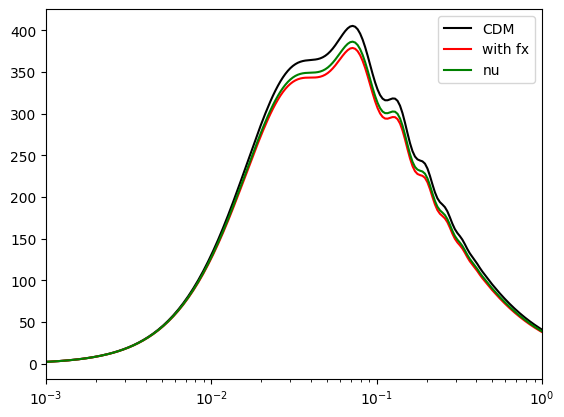

In [4]:
%matplotlib inline

zeval = 0.5
kk = np.logspace(-3.,0.,200); h = CDMcosmo.h(); Pk_list=[]
for k in kk:
    Pk_list.append([CDMcosmo.pk_lin(k*h,zeval)*h**3,fxcosmo.pk_lin(k*h,zeval)*h**3,nucosmo.pk_lin(k*h,zeval)*h**3]) # function .pk(k,z)
Pk_list=np.array(Pk_list)


plt.plot(kk,kk*Pk_list[:,0], 'k', label='CDM')
plt.plot(kk,kk*Pk_list[:,1],'r', label='with fx')
plt.plot(kk,kk*Pk_list[:,2],'g', label='nu')

# plt.loglog(kk_cdm,Pkatk_cdm[:,-1]*h**3, 'k', label='CDM')
# plt.loglog(kk_fx,Pkatk_fx[:,-1]*h**3,'r', label='with fx')
# plt.loglog(kk_nu,Pkatk_nu[:,-1]*h**3,'g', label='nu')


plt.xscale('log')
plt.xlim([1.e-3,1])
# plt.ylim([1.e2,None])
plt.legend()
plt.show()

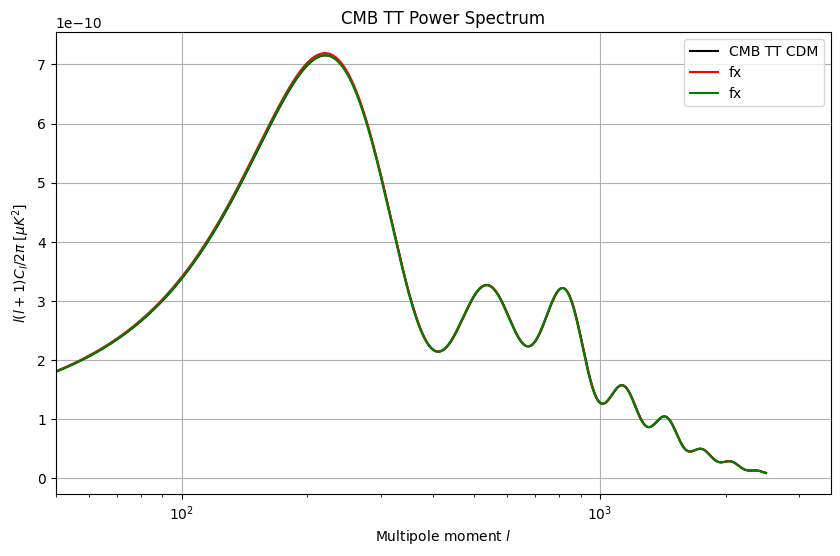

In [23]:
# Extract the CMB power spectrum
cls = CDMcosmo.raw_cl()
l = cls['ell'][2:]
Cl_TT = cls['tt'][2:]


# Plot the CMB power spectrum
plt.figure(figsize=(10, 6))
plt.semilogx(l, l * (l + 1) * Cl_TT / (2 * np.pi), 'k', label='CMB TT CDM')
plt.semilogx(l, l * (l + 1) * fxcosmo.raw_cl()['tt'][2:] / (2 * np.pi), 'r', label='fx')
plt.semilogx(l, l * (l + 1) * nucosmo.raw_cl()['tt'][2:] / (2 * np.pi), 'g', label='fx')

plt.xlabel(r'Multipole moment $l$')
plt.ylabel(r'$l(l+1)C_l / 2\pi$ [$\mu K^2$]')
plt.title('CMB TT Power Spectrum')
plt.legend()
plt.grid(True)
plt.xlim([50,None])
plt.show()

----
check cobaya

In [17]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/br_fx_boss.yaml")
info_from_yaml['likelihood']['pbjboss']['likelihood']['store_theorydict']=True
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
model_pbj = get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[classy] `classy` module loaded successfully from /home/fverdian/anaconda3/lib/python3.10/site-packages


[info] The linear power spectrum will be computed with cobaya
[info]  Using scale dependent f
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.
[absl] Fingerprint not found. Saved model loading will continue.


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to bre

Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True
[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz_withchi as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


In [22]:
pbjObj_c = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj_c.z_bins
kCut = pbjObj_c.kPE[pbjObj_c.IdxP[0]]

pointspec={'b1_sgc_z3': 2., 'omega_b': 0.022, 'b1_sgc_z1': 2., 'b1_ngc_z3': 2., 'h': 0.67, 'b1_ngc_z1': 2.7, 'omega_cdm': 0.12,  'logA': 3.044, 
           'omega_chi':0.01,
          'br_ngc_z1': 0.,'br_sgc_z1': 0.2, 'br_ngc_z3': 0.5, 'br_sgc_z3': 0.5 }

# CLASS
logposterior = model_pbj.logposterior(pointspec, as_dict=True)
print(logposterior)
# PL_class = model_pbj.provider.get_Pk_interpolator(nonlinear=False).P(0.61,kCut)
Pell_class = pbjObj_c.theorydict[0]['P0']

Storing theorydict, althought it makes not much sense with analytical marginalization
{'logpost': -228.5962469567589, 'logpriors': {'0': 9.231176697610444}, 'loglikes': {'pbjboss': -237.82742365436934}, 'derived': {'acs_chi': 0.0064199999999999995, 'A_s': 2.0989031673191437e-09}}


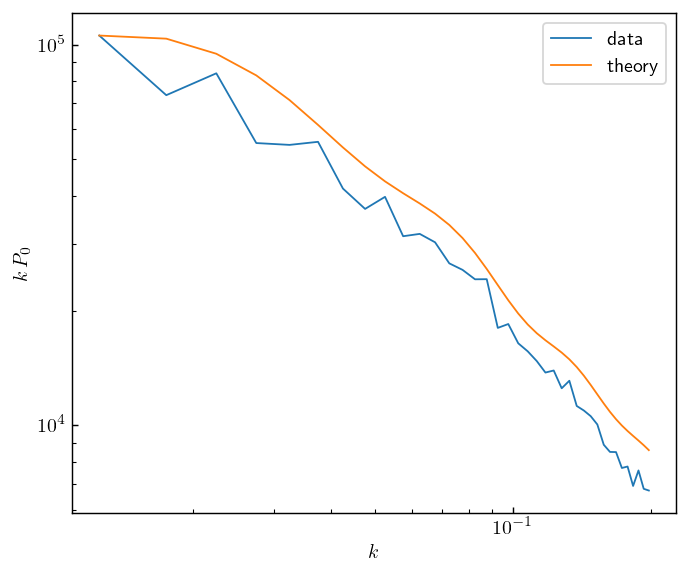

In [23]:
%matplotlib inline
plt.figure(figsize=(6,5),dpi=130)

# for i in range(len(z_bins)):
#     var = np.diag(pbjObj_c.Cov[i][:len(kCut),:len(kCut)])
#     plt.errorbar(kCut, kCut*pbjObj_c.CutDataVecs[i][0], yerr=kCut*np.sqrt(var), label=f'P0 at z={z_bins[i]}', linewidth=1.)

plt.loglog(kCut, pbjObj_c.CutDataVecs[0][0], label='data', linewidth=1.)
plt.loglog(kCut, Pell_class, label='theory', linewidth=1.)


plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()

with bacco

In [4]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/pbj_boss_b1only.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
m_bacco = get_model(info_from_yaml)

pbjObj_b = m_bacco.likelihood["pbjboss"].pbjobj



[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[info] The linear power spectrum will be computed with bacco
Loading linear emulator...
[absl] Fingerprint not found. Saved model loading will continue.
[absl] Fingerprint not found. Saved model loading will continue.
Linear emulator loaded in memory.
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True


/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fverdian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to bre

[0.38 0.38 0.61 0.61] {'h': 0.676, 'Obh2': 0.022, 'Och2': 0.119}
[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


--- bacco vs class

In [3]:
h=0.67
params = {
    'ns'            : 0.96,
    'A_s'           : np.exp(3.044)*1.e-10,
    'hubble'        : h,
    'omega_baryon'  : 0.022/h/h,
    'omega_cold'    : (0.144)/h/h, # This is Omega_cb!!!
    'neutrino_mass' : 0.,
    'w0'            : -1.,
    'wa'            : 0.,
    'expfactor'     : 1.
}

kL = np.logspace(-2, np.log10(0.2), 100)

kcut = kL[np.where(kL <= 50)]
kcut, PL_bacco = emulator.get_linear_pk(k=kcut, cold=True, **params)
# PL_class = model_pbj.provider.get_Pk_interpolator(nonlinear=False).P(0.,kcut*h)*h**3


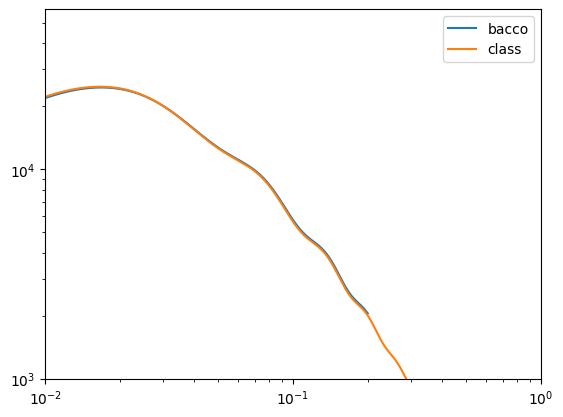

In [13]:
%matplotlib inline
plt.loglog(kcut,PL_bacco, label='bacco')
# plt.loglog(kcut,PL_class, label='cobaya')
# plt.loglog(kL,Pk_cb_class, label='class')
plt.loglog(kk,Pkatk[:,-1]*h**3, label='class')

plt.xlim([1.e-2,1])
plt.ylim([1.e3,None])
plt.legend()
plt.show()

In [21]:
from classy import Class

CDMcosmo = Class()
CDMcosmo.set({'h': 0.67, 'omega_b': 0.022, 'omega_cdm': 0.12, 'A_s': 2.0989031673191437e-09, 'n_s': 0.96, 'tau_reio': 0.0925, 'N_ncdm': 0.0, 'N_ur': 3.046, 'non_linear': 'none', 'input_verbose': 3, 'output': 'lCl tCl mPk pCl', 'P_k_max_1/Mpc': 5, 'z_pk': '0.61 0.38 0', 'k_per_decade_for_pk':1.,'k_per_decade_for_bao':2.})

CDMcosmo.compute()
kL = np.logspace(-2, np.log10(0.2), 100)

Pk_cb_class = [] # P(k) in (Mpc/h)**3
for kk in kL:
    Pk_cb_class.append(CDMcosmo.pk(kk*h, 0.)*h**3 ) # function .pk(k,z)

Pkatk, kk , zz = CDMcosmo.get_pk_and_k_and_z(nonlinear=False, h_units=True)
print(kk.shape)

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.683578
(532,)


In [2]:
%%capture
import baccoemu
emulator = baccoemu.Matter_powerspectrum();

2025-01-19 15:45:43.306992: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 15:45:43.309171: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-19 15:45:43.663771: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-19 15:45:43.730812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 15:45:49.002271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co